# Hoja de Trabajo #5 - (Numpy, Pandas, Vectorización)

In [2]:
import pandas as pd
import numpy as np

Desarrollar los siguientes ejercicios y subir el Notebook actualizado a su **repositorio de GitHub**. El entregable debe ser el link del archivo en su repositorio, **cualquier otra forma de entregable no sera aceptada**.

# Numpy

## Ejercicio 1: Crear un conjunto de datos lineal

Crear un conjunto de datos simple que consta de una sola característica y una etiqueta de la siguiente manera:

1. Asigne una secuencia de números enteros del 6 al 20 (incluyendo 20) a un arreglo de NumPy llamado `caracteristica`.
2. Asigne 15 valores a un arreglo de NumPy llamado `etiqueta` de manera que:

```
    etiqueta = (3) (caracteristica) + 4
```
Por ejemplo, el primer valor de `etiqueta` debería ser:

```
   etiqueta = (3) (6) + 4 = 22
```

In [11]:
# Desarrollar solucion

caracteristica = np.arange(6, 21, 1)
etiqueta = (caracteristica*3) +4
etiqueta

array([22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64])

## Ejercicio 2: agregar ruido al conjunto de datos

Inserte un ruido aleatorio en cada elemento de la matriz `etiqueta` que ya creó. Para ser más precisos, modifique cada valor asignado a `etiqueta` agregando un valor "floating-point" aleatorio *diferente* entre -2 y +2.

No utilice broadcasting. En su lugar, cree un arreglo de `ruido` que tenga la misma dimensión que `etiqueta`.

In [392]:
# Desarrollar solucion
ruido = etiqueta + np.random.uniform(-2, 2, len(etiqueta))
ruido

array([19.47113253, 23.81493761, 27.10554741, 30.00024159, 31.50401622,
       37.76978141, 38.99740597, 41.74607404, 44.44881485, 49.93500034,
       53.5674003 , 54.20920846, 59.47694366, 61.62026882, 66.58069116])

# Pandas

## Ejericio 3: Crear un DataFrame

Hacer lo siguiente:

   1. Cree un pandas DataFrame de 10x3 (10 filas x 3 columnas) en el que las columnas se denominen "Data Warehouse", "Python in Data Science", y "Estadistica Aplicada". Llene cada una de las 30 celdas del DataFrame con un número entero aleatorio entre 0 y 100, incluyendo 100.

   2. Despliege lo siguiente:

      * Todo el DataFrame
      * Las primeras 5 filas del DataFrame
      * Las ultimas 5 filas del DataFrame
      * El valor en la celda de la fila # 1 de la columna "Data Warehouse"
      * El valor en la celda de la fila # 3 de la columna "Estadistica Aplicada" 

   3. Cree una cuarta columna llamada "Promedio", que se rellena con el promedio fila por fila de las otras 3 columnas ("Data Warehouse", "Python in Data Science", y "Estadistica Aplicada"). Debe de usar la funcion de Numpy para calcular el promedio.

Para completar esta parte, es útil entender los conceptos básicos de NumPy cubiertos en clase y en la seccion anterior.

In [102]:
# Desarrollar solucion
columns = ['Data Warehouse', 'Python in Data Science', 'Estadistica Aplicada']
df = pd.DataFrame(np.random.randint(101, size=(10,3)), columns = columns)
df.index += 1
df

,Data Warehouse,Python in Data Science,Estadistica Aplicada
1,1,5,89
2,53,45,3
3,99,53,72
4,2,34,92
5,69,5,30
6,92,39,2
7,43,25,90
8,64,54,25
9,47,39,69
10,2,69,20


In [103]:
df[:5]

,Data Warehouse,Python in Data Science,Estadistica Aplicada
1,1,5,89
2,53,45,3
3,99,53,72
4,2,34,92
5,69,5,30


In [104]:
df[-5:]

,Data Warehouse,Python in Data Science,Estadistica Aplicada
6,92,39,2
7,43,25,90
8,64,54,25
9,47,39,69
10,2,69,20


In [113]:
df.loc[1, 'Data Warehouse']

1

In [112]:
df.loc[3,'Estadistica Aplicada']

72

In [126]:
df['Promedio'] = np.round(np.mean(df, axis=1), 2)
df

,Data Warehouse,Python in Data Science,Estadistica Aplicada,Promedio
1,1,5,89,31.67
2,53,45,3,33.67
3,99,53,72,74.67
4,2,34,92,42.67
5,69,5,30,34.67
6,92,39,2,44.33
7,43,25,90,52.67
8,64,54,25,47.67
9,47,39,69,51.67
10,2,69,20,30.33


# Vectorización

## Ejericio 4: Vectorización

A continuacion, se le presenta un problema el cual debera resolver de dos formas distintas. La primera es utilizando un `for loop`, la segunda usando `vectorización`. Luego debe de comparar comprar el resultado de ambas implementaciones, tanto el valor resultante de la operacion, como el tiempo que toma la ejecucion de cada una.



**Problema:**

Dada una secuencia de precios historicos para una acción, y suponiendo que solo se le permite realizar una compra y una venta, ¿cuál es la ganancia máxima que se puede obtener? 

Por ejemplo, dados los precios = (20, 18, 14, 17, 20, 21, 13), el beneficio máximo sería 7, de comprar a 14 y vender a 21. Notar que el arreglo es una secuencia, por lo tanto no es factible solo utilizar los valores menores y mayores, ya que el valor mayor debe de estar obligatoriamente en una posicion futura al menor, por eso el mejor precio de compra es 14 y no 13.

Para este ejemplo utilice el siguiente codigo para generar el dataset (secuencia de precios historicos), asegurese de tambien incluir el "random seed" para obtener reproducibilidad. 

In [374]:
# Seed para reproducibilidad
np.random.seed(42)
# Creamos un arreglo que en su mayoria contiene Nans con algunos "puntos de inflexion" (local min/max).
precios = np.full(100, fill_value=np.nan)
precios[[0, 25, 60, -1]] = [80., 30., 75., 50.]

# De manera lineal interpolamos los valores faltantes y agregamos ruido.
x = np.arange(len(precios))
es_valido = ~np.isnan(precios)
precios = np.interp(x=x, xp=x[es_valido], fp=precios[es_valido])
precios += np.random.randn(len(precios)) * 2
precios

array([80.99342831, 77.7234714 , 77.29537708, 77.04605971, 71.53169325,
       69.53172609, 71.15842563, 67.53486946, 63.06105123, 63.08512009,
       59.07316461, 57.06854049, 56.48392454, 50.17343951, 48.55016433,
       48.87542494, 45.97433776, 46.62849467, 42.18395185, 39.1753926 ,
       42.93129754, 37.5484474 , 36.13505641, 31.15050363, 30.91123455,
       30.22184518, 28.98372713, 33.32282461, 32.65586548, 34.55946964,
       35.2251582 , 41.41884208, 38.97300555, 38.17029243, 43.2165184 ,
       40.41545556, 44.56058433, 41.50923118, 44.05791362, 48.39372247,
       50.76264745, 50.91416513, 51.62584629, 52.54064975, 51.47152745,
       54.2745973 , 56.07872246, 60.39995874, 60.25866515, 57.33106255,
       62.79102508, 62.65840687, 63.36044171, 67.22335258, 69.34771333,
       70.43398881, 68.17870781, 70.52443239, 73.09109829, 75.66537597,
       74.04165152, 73.98765641, 71.50527877, 70.68450983, 74.06094908,
       74.50735185, 71.00982591, 72.51988631, 70.59506692, 67.94

Ejemplo de lo que se busca calcular: 

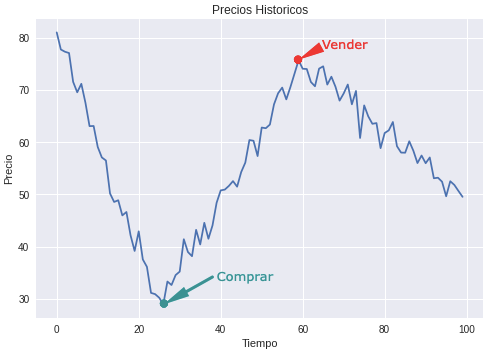

In [379]:
from time import time

In [380]:
# Desarrollar solucion
# for loop
min = max = {0 : precios[0]}
inicio = time()
for i in range(len(precios)):
    aux_min = min
    if precios[i] < next(iter(min.values())):
        min = {i : precios[i]}
    if precios[i] > next(iter(max.values())):
        max = {i : precios[i]}
    if next(iter(min.keys())) > next(iter(max.keys())):
        if next(iter(min.values())) < next(iter(max.values())):
            if (i+1 == len(precios)):
                min = aux_min
            else:
                max= {i+1: precios[i+1]}
fin = time()
ganancia_max = next(iter(max.values())) - next(iter(min.values()))
print('1) Ganancia máxima:', ganancia_max, '2) Comprar:', next(iter(min.values())), '3) Vender:', next(iter(max.values())), '4) Tiempo loop:', fin-inicio )

1) Ganancia máxima: 46.68164883766076 2) Comprar: 28.983727130869678 3) Vender: 75.66537596853044 4) Tiempo loop: 0.0010018348693847656


In [378]:
# vectorización


In [389]:
%%!
git push -u origin master

["Branch 'master' set up to track remote branch 'master' from 'origin'.",
 'To https://github.com/hdtahay99/hoja-5-data-science-python.git',
 ' * [new branch]      master -> master']

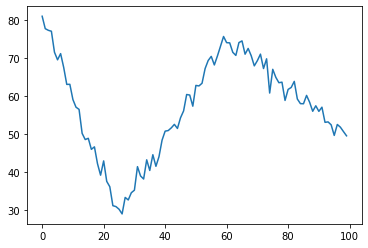

In [135]:
import matplotlib.pyplot as plt
plt.plot(precios, )